# Medical health insurance Cost analysis

Dataset Link-

https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading  and exploring the dataset
df=pd.read_csv('medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
994,27,female,20.045,3,yes,northwest,16420.49455
1095,18,female,31.350,4,no,northeast,4561.18850
665,43,male,38.060,2,yes,southeast,42560.43040
1310,42,male,26.315,1,no,northwest,6940.90985
1004,47,male,19.190,1,no,northeast,8627.54110


In [6]:
#row and columns
print('Number of rows:',df.shape[0],"",'Number of columns:',df.shape[1])

Number of rows: 1338  Number of columns: 7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns

In [8]:
#General statistical description of numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type.

In [9]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Based on the results from describe, we also see these variables are at the top and more frequent in the dataset: male, non-smoker, southeast region

# Visualizing the Data

Distribution of Charges

<Axes: xlabel='charges', ylabel='Density'>

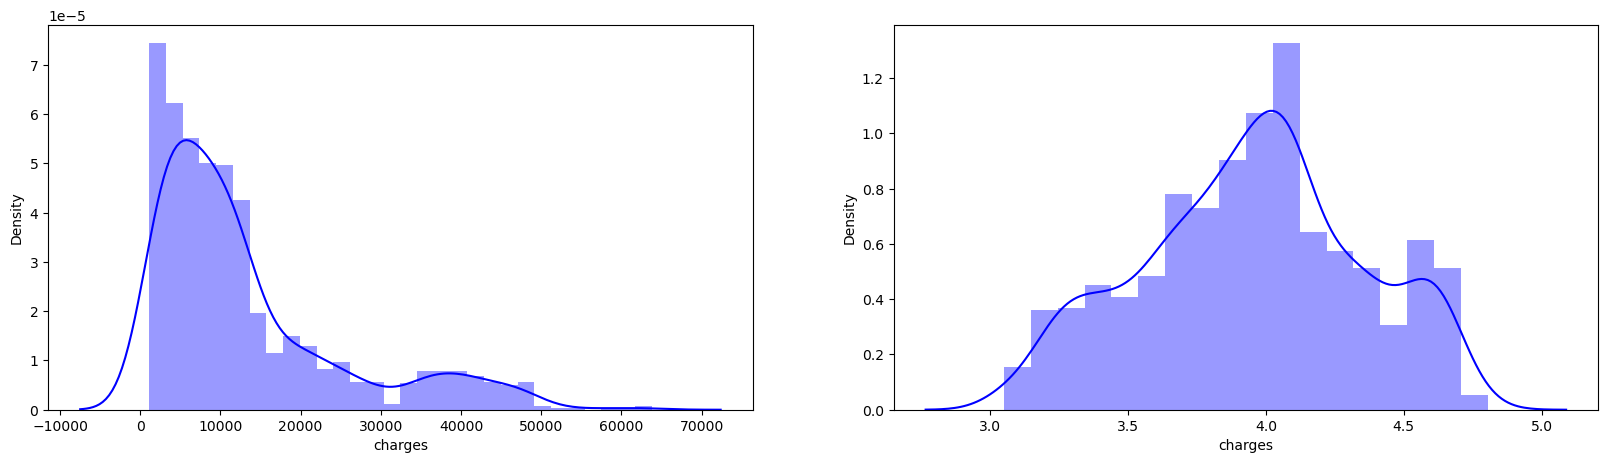

In [10]:
#distribution of the charges
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color ='b')

#Natural log for approximately normal distribution 
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges),color='b')

Note : The distribution of the charges is skewed to the right, so we applied natural log for ~ normal distribution

# Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

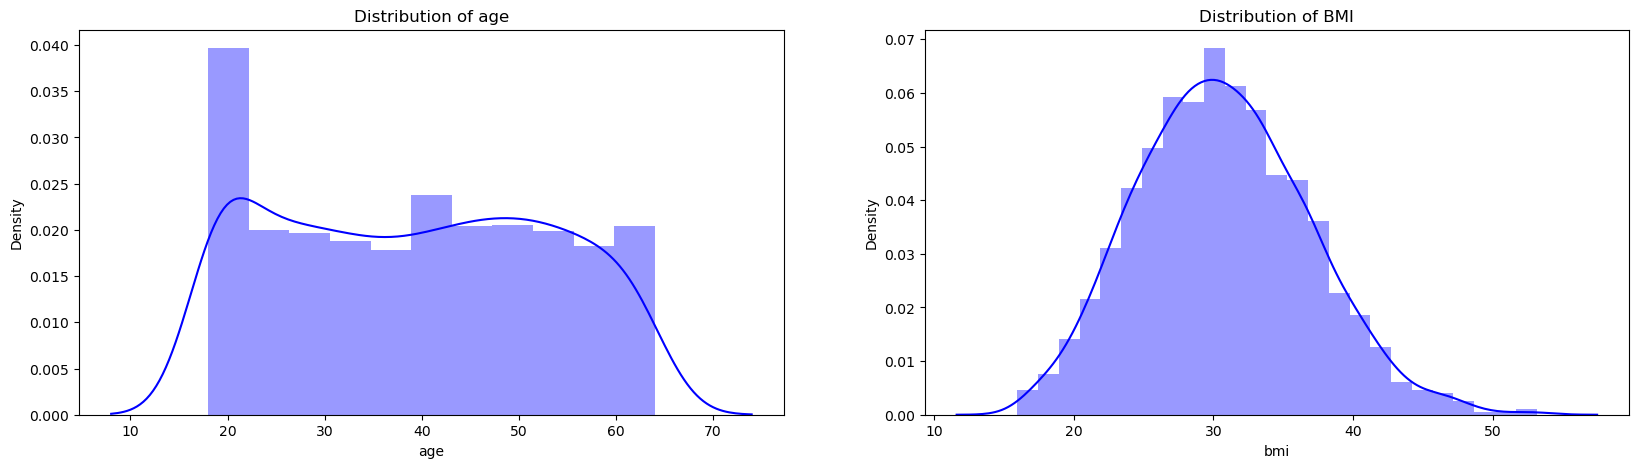

In [20]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

<function matplotlib.pyplot.show(close=None, block=None)>

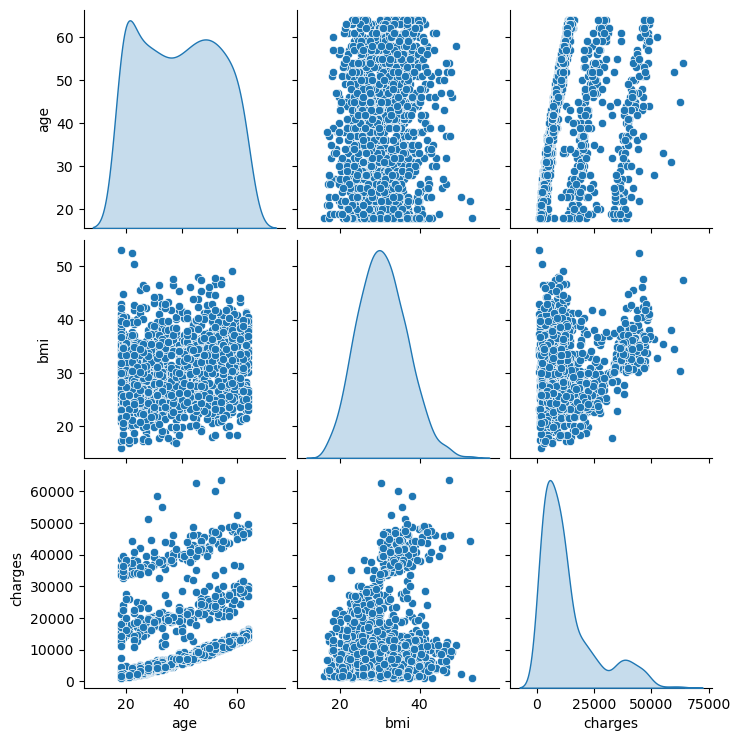

In [21]:
#pairplot age and bmi charges
df_num=df[['age','bmi','charges']]
sns.pairplot(df_num,diag_kind= 'kde')
plt.show


The pairplot revels that thereis a linear Relationship between age, bmi with charges

# visualizing categorical variables individually vs medical charges


<Axes: xlabel='smoker', ylabel='charges'>

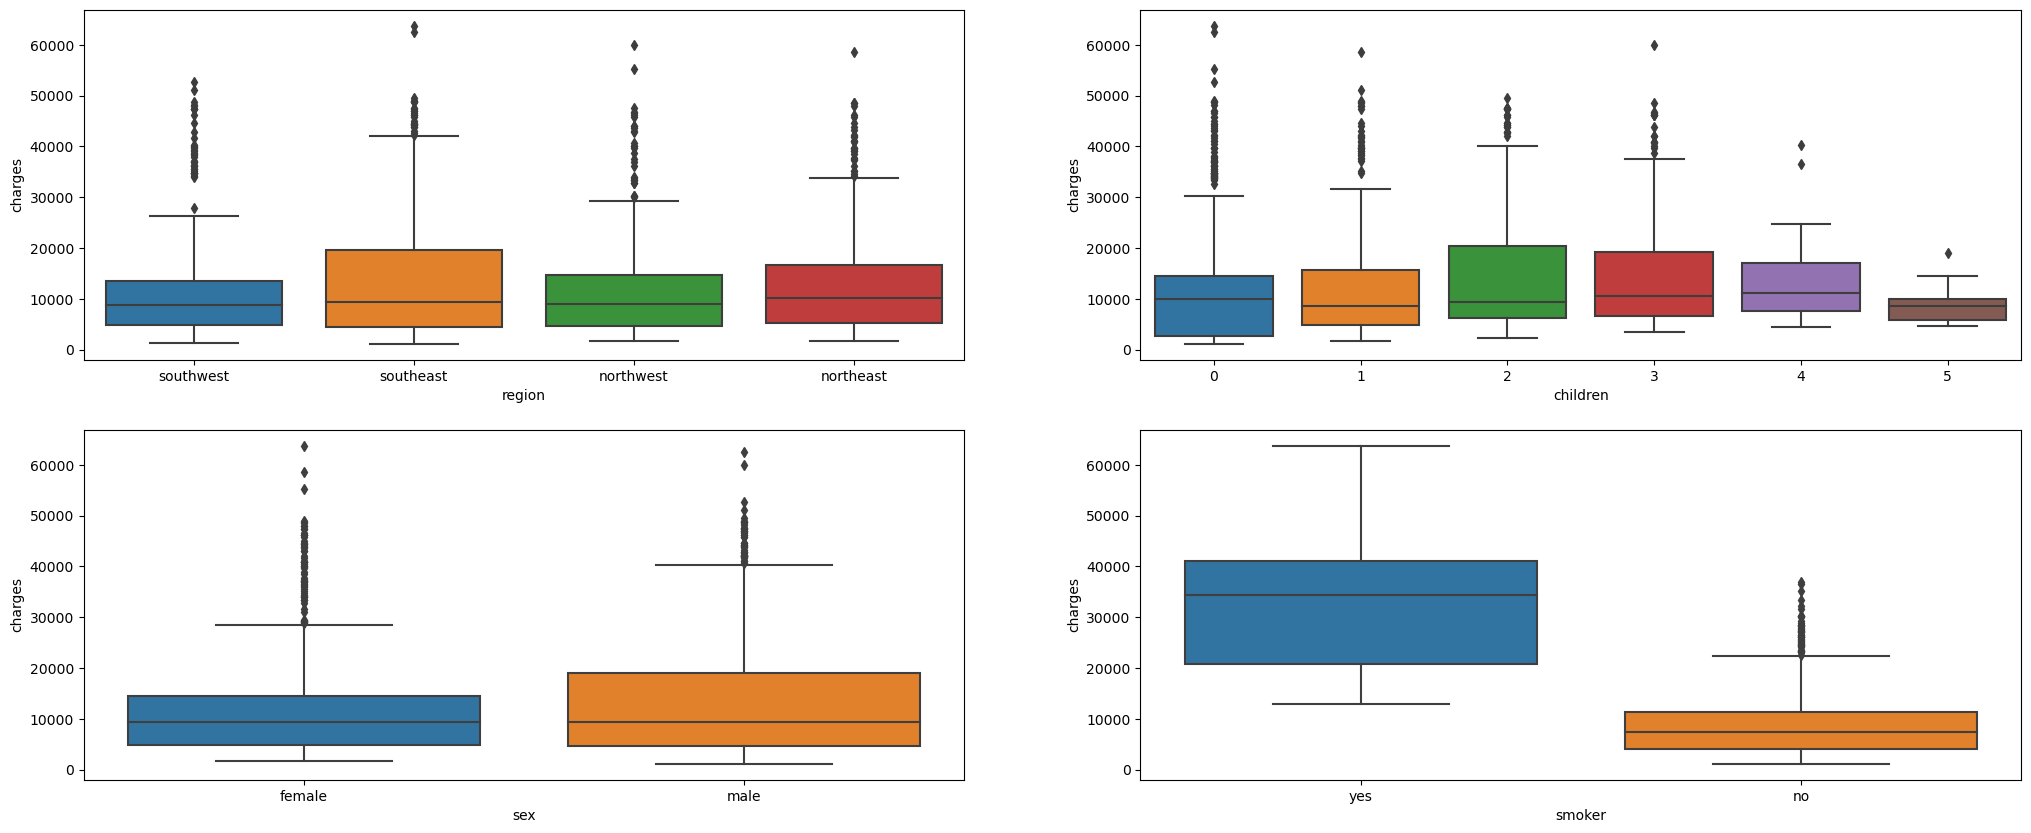

In [12]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='region',y='charges',data=df)

plt.subplot(2,2,2)
sns.boxplot(x= 'children', y='charges', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='sex', y='charges',data=df)

plt.subplot(2,2,4)
sns.boxplot(x='smoker', y='charges', data=df)

# Bi-Variate Analysis

Charge by Region


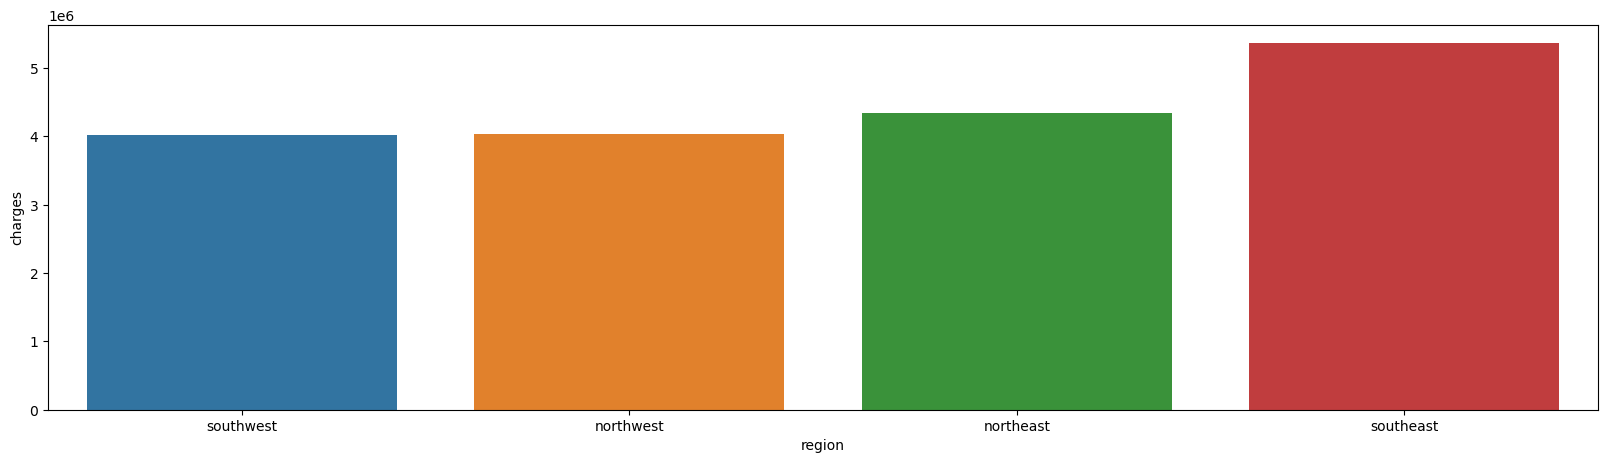

In [24]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

The highest amount of charges are in the Southeast while the lowest are in the Southeast.Based on this, lets see hoe charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior

# Charge by Region and number of children

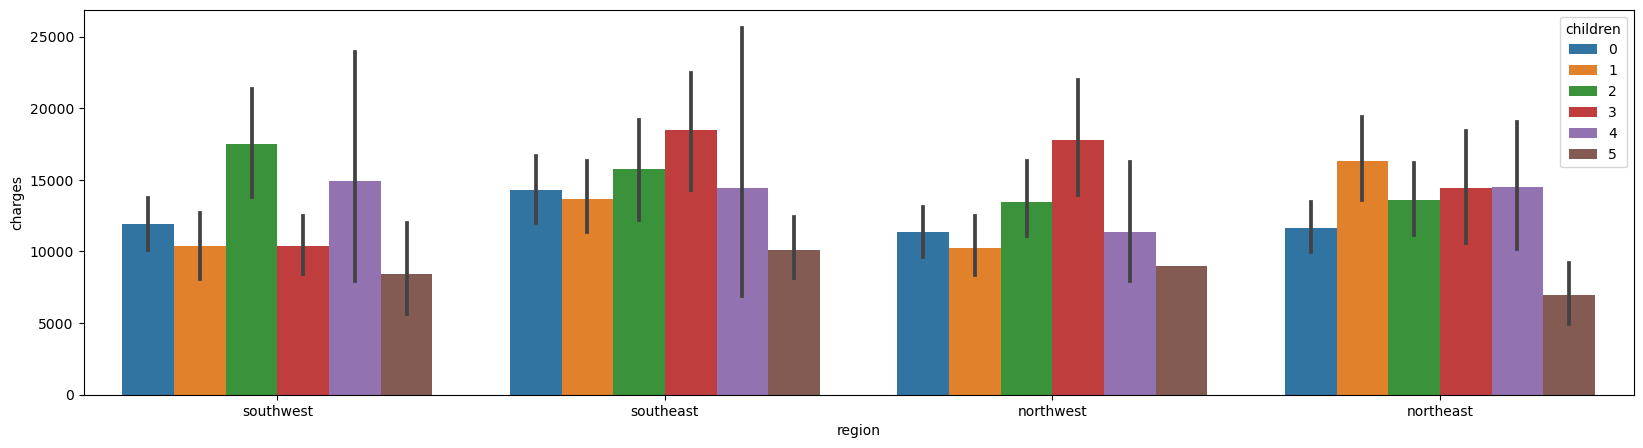

In [25]:
#setting children as hue parameter
plt.figure(figsize=(20,5))
ax= sns.barplot(x='region' , y='charges', hue='children', data=df)

It seems that there is not a statistical difference in terms of how the number of children a particular region affects charges 

# Charges by region and gender

<Axes: xlabel='region', ylabel='charges'>

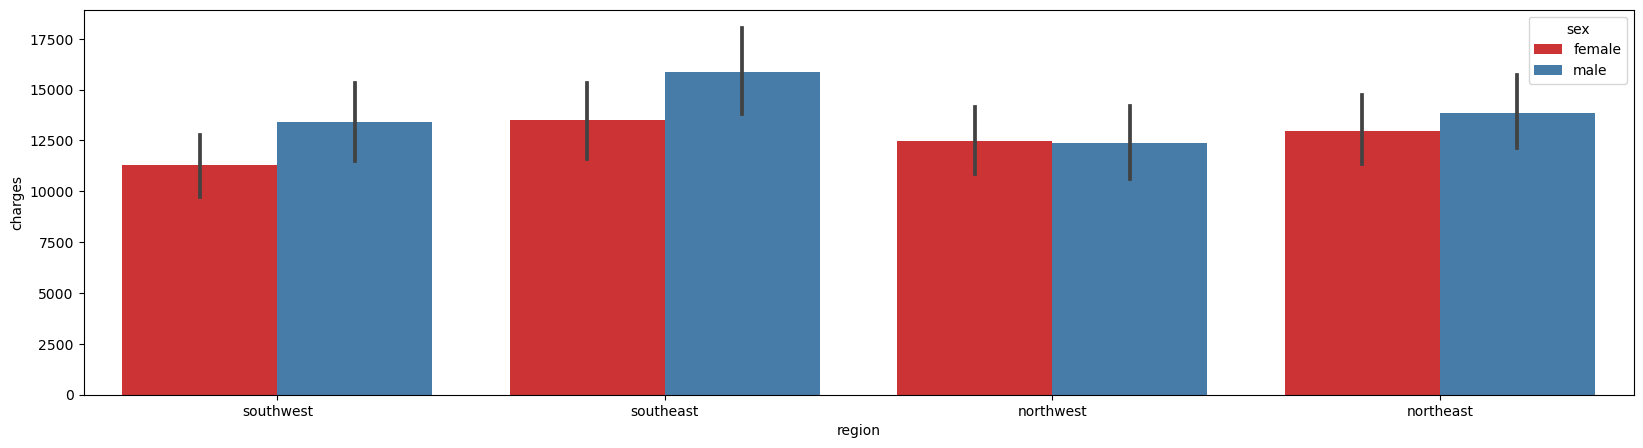

In [15]:
#setting Sex as hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x= 'region', y = 'charges', hue='sex', data=df, palette='Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges

# Charges by region and smoking behavior 

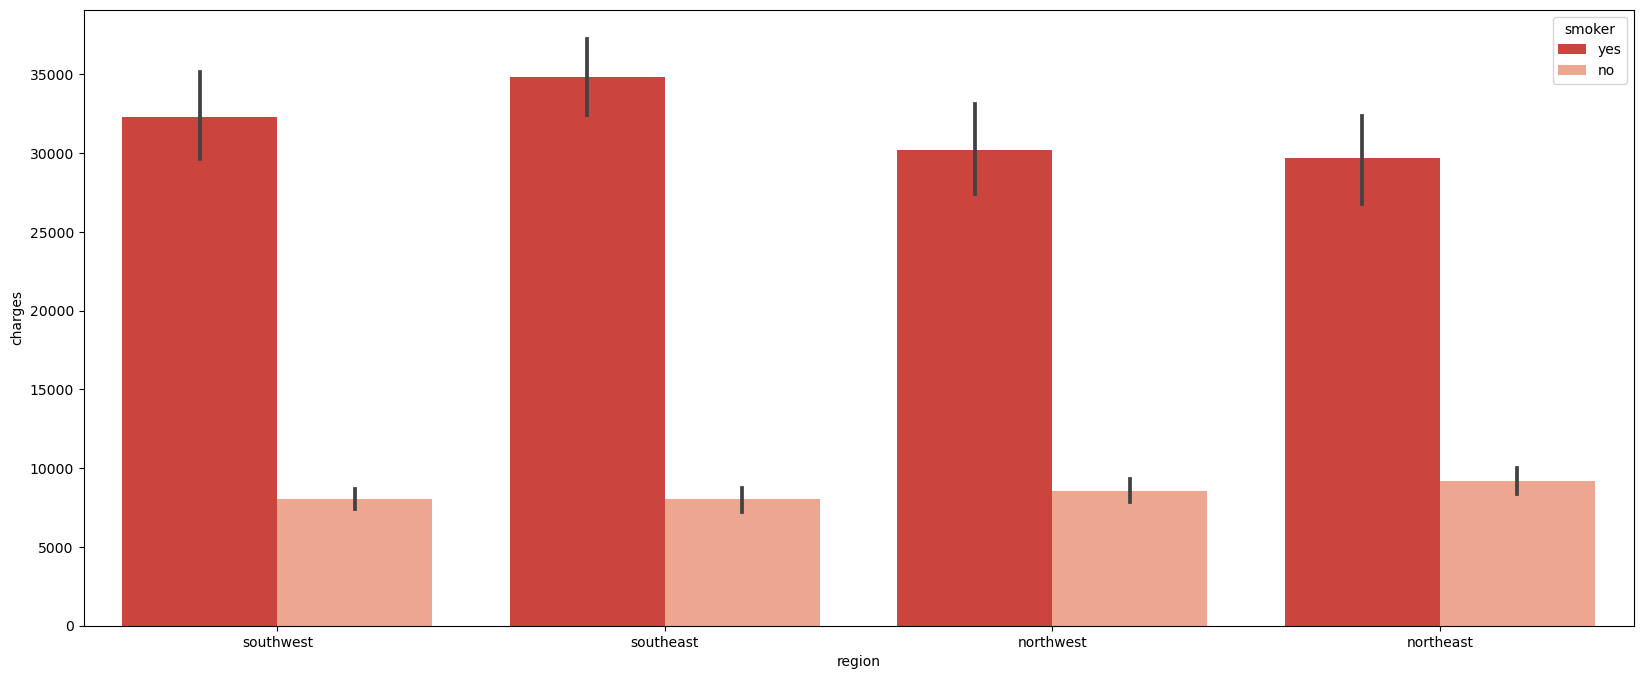

In [27]:
f,ax =plt.subplots(1,1, figsize=(20,8))
ax=sns.barplot(x='region', y ='charges', hue='smoker', data=df, palette= 'Reds_r')

in contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior  in region affects charges


From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, lets see the correlation between non-catagorical variables(age,bmi,and children) with medical charges (evaluated based on smoking behavior)

# Charge by age, bmi and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

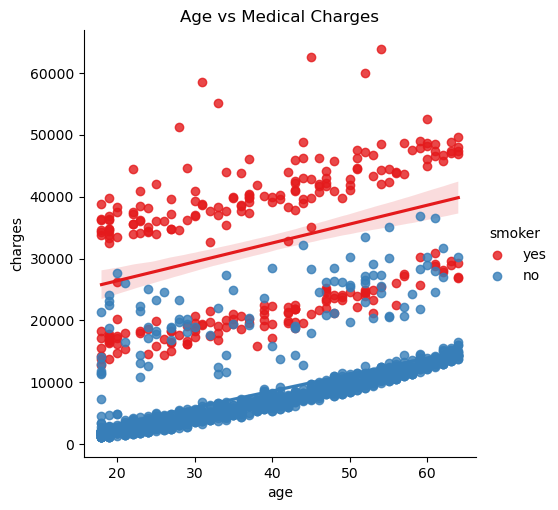

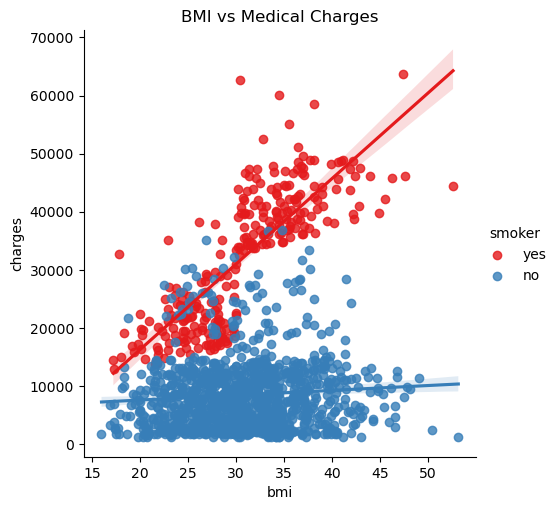

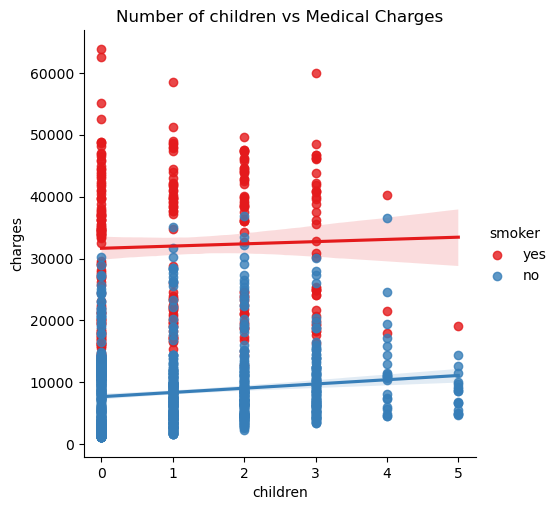

In [30]:
ax= sns.lmplot(x='age', y='charges', data=df , hue='smoker', palette='Set1')
plt.title('Age vs Medical Charges')

ax=sns.lmplot(x='bmi', y='charges', data=df, hue= 'smoker', palette='Set1')
plt.title('BMI vs Medical Charges')

ax=sns.lmplot(x='children', y='charges', data=df , hue= 'smoker', palette='Set1')
plt.title('Number of children vs Medical Charges')

In [ ]:
Based on the anaylsis
1> We know that smkoing has a great impact on medical costs.
2> Smoking in combination with an increase in other factors, such as age, bmi and children and increases the medical cost due to smoking


# Data Correlation


To Confirm our findings, lets look at the correlation between all the columns by constructing a pairplot and correlation heatmap.


In order to do so, we need to first convert all object labels into catagorical variables and then convert them to numrical values


In [32]:
#converting data to catagorical type data 
df[['region', 'sex', 'smoker']]=df[['region','sex', 'smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [38]:
#converting data to numerical type using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

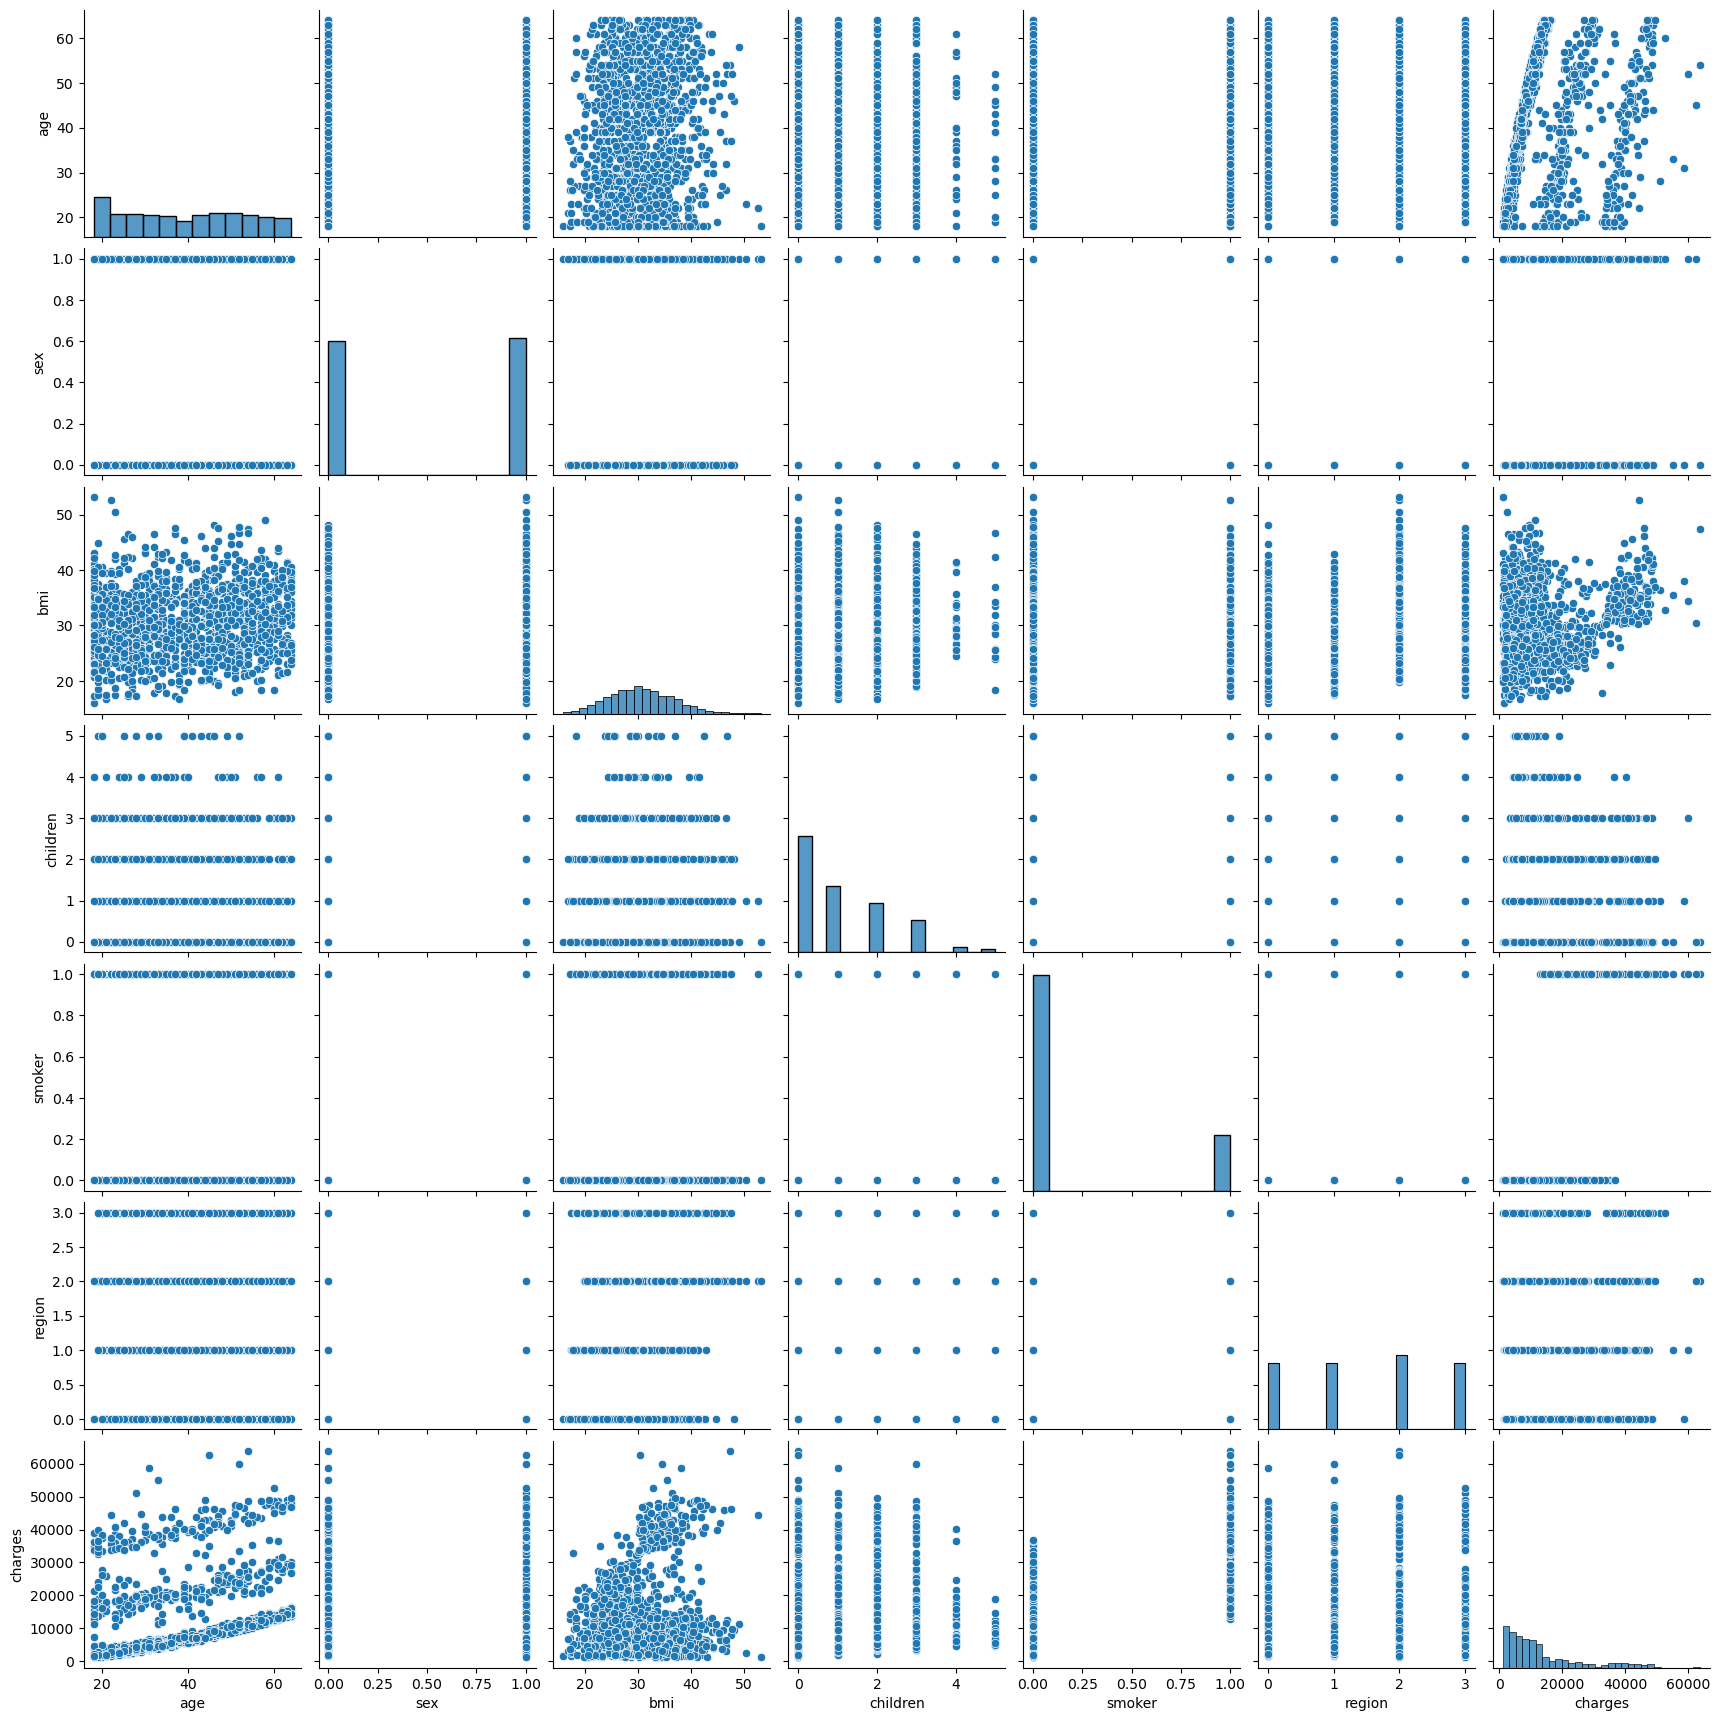

In [39]:
sns.pairplot(df)

Text(0.5, 1.0, 'correlation Factors heatmap')

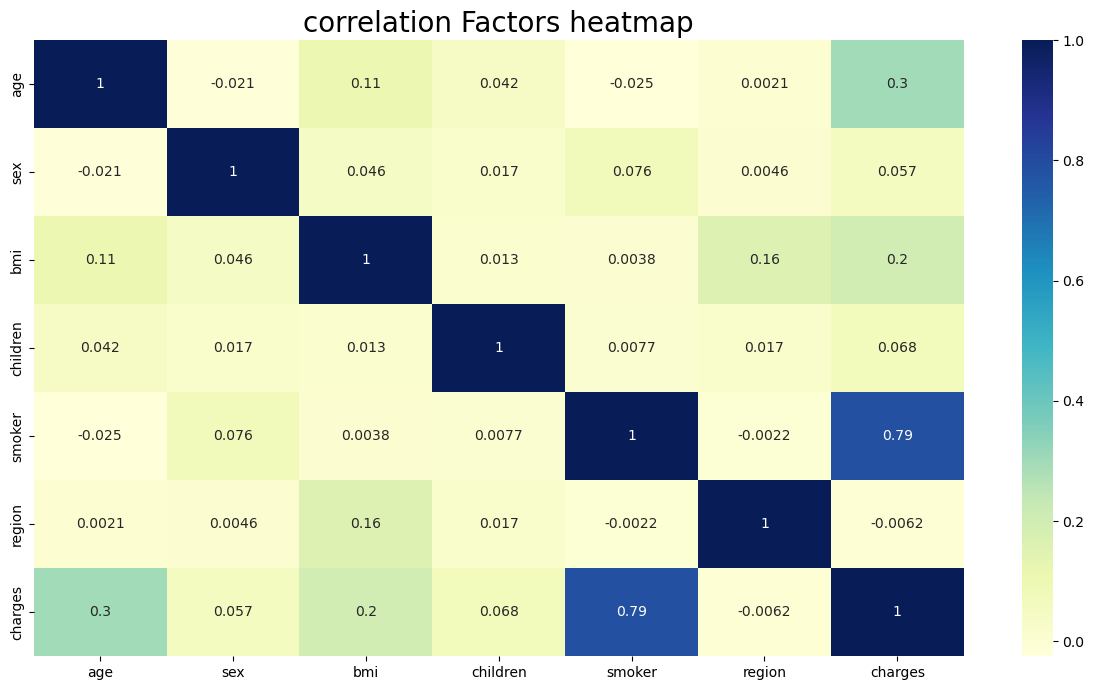

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu').set_title('correlation Factors heatmap',size="20")


1> The heatmap shows variables that are multicollinear in nature and the variables that have high collinearity with the target variable (charges)
2> This revels that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.


# Praparing Data for Machine Learning 

Now that we understand our dataset, it is time to apply machine learning methods to prdict future insurance cost of patients based on several factors


First, we to prepare our data by splitting it into training and testing data 

In [42]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
features=df.drop(['charges'], axis=1)
targets =df['charges']


In [44]:
x_train,x_test,y_train,y_test = holdout(features,targets, test_size=0.2, random_state=0)

# Machine Learning

The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

1> Linear Regression
2> Random Forest Regressor
3> Polynomial Regression

# 1.  Linear Regression

In [47]:
Lin_reg_model=LinearRegression()
Lin_reg_model.fit(x_train,y_train)

print('Intercept:',Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.983908824432
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [51]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred =Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred=Lin_reg_model.predict(x_test)

#Mean squared error
Lin_reg_model_train_mse =mean_squared_error(y_train,Lin_reg_model_train_pred)
Lin_reg_model_test_mse= mean_squared_error(y_test,Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data:  {:.3}\n'.format(Lin_reg_model_train_mse,Lin_reg_model_test_mse))

#Root mean squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(np.sqrt(np.absolute(Lin_reg_model_train_mse)),np.sqrt(np.absolute(Lin_reg_model_train_mse))))

#R^2 - coefficient of determination

print('R2 train data: {:.3},\nR2 test data: {:.3}\n'.format(r2_score(y_train,Lin_reg_model_train_pred), r2_score(y_test,Lin_reg_model_test_pred)))

#Model Score
print('Model Score:', Lin_reg_model.score(x_test,y_test))

MSE train data: 3.77e+07, 
MSE test data:  3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737,
R2 test data: 0.8

Model Score: 0.799874714544996


The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding unimportant independent variables.

# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mse' instead.

# Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [61]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.881705253554
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345231


The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding umimportant independent variables.

# Best Algorithm:

In [62]:
#Independent variables
features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [63]:
#Dependent variable
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [65]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
